### Sample program for calculating accuracy measures and plotting ROC / PR curve

#### Import libraries  

In [61]:
import random
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import precision_score, recall_score, accuracy_score
from sklearn.metrics import f1_score, matthews_corrcoef

#### Parameters  

In [62]:
csv_in = 'ai-end1-1.csv'

#### CSV file  

In [63]:
df = pd.read_csv(csv_in, delimiter=';', skiprows=0, header=0)
display(df[df.isnull().any(axis=1)])
df = df.dropna().reset_index(drop=True)
print(df.shape)
print(df.info())
display(df.head())


,label,A,B,C
20,NaN,0.91215,0.861708,0.552452


(99, 4)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 0 to 98
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   label   99 non-null     float64
 1   A       99 non-null     float64
 2   B       99 non-null     float64
 3   C       99 non-null     float64
dtypes: float64(4)
memory usage: 3.2 KB
None


,label,A,B,C
0,0.0,0.540481,0.306353,0.646120
1,1.0,0.985419,0.820488,0.975581
2,0.0,0.339498,0.172193,0.579292
3,0.0,0.267175,0.314082,0.347204
4,0.0,0.912779,0.514865,0.494232


#### Confusing matrix (混同行列) and measurements for prediction accuracy for each method  

In [64]:
print('A')
print('accuracy(Q2):', accuracy_score(df['label'], df['A']>=0.6))

A
accuracy(Q2): 0.797979797979798


In [65]:
print('B')
print('precision:', precision_score(df['label'], df['B']>=0.5))

B
precision: 0.75


In [66]:
print('C')
print('precision:', precision_score(df['label'], df['C']>=0.5))
print('recall:', recall_score(df['label'], df['C']>=0.5))
print('accuracy(Q2):', accuracy_score(df['label'], df['C']>=0.5))
print('f1:', f1_score(df['label'], df['C']>=0.5))
print('matthews:', matthews_corrcoef(df['label'], df['C']>=0.5))
predC = df['C'].map(lambda x: 1 if x >= 0.5 else 0)
ctC = pd.crosstab(df['label'], predC)
fpC = ctC.loc[0,1]
tnC = ctC.loc[0,0]
print('false positive rate:', fpC/(fpC+tnC))

C
precision: 0.6268656716417911
recall: 0.875
accuracy(Q2): 0.6868686868686869
f1: 0.7304347826086957
matthews: 0.4111807795245238
false positive rate: 0.49019607843137253


#### ROC curve and its AUC for each method  

In [67]:
y_true = df['label']
y_score = df['A']
fprA, tprA, thresholdsA = roc_curve(y_true, y_score)
print('AUC(A):', roc_auc_score(y_true, y_score))
#print('AUC(A):', auc(fprA, tprA))  # from fpr and tpr
y_score = df['B']
fprB, tprB, thresholdsB = roc_curve(y_true, y_score)
print('AUC(B):', roc_auc_score(y_true, y_score))
#print('AUC(B):', auc(fprB, tprB))  # from fpr and tpr
y_score = df['C']
fprC, tprC, thresholdsC = roc_curve(y_true, y_score)
print('AUC(C):', roc_auc_score(y_true, y_score))
#print('AUC(C):', auc(fprC, tprC)) # from fpr and tpr

AUC(A): 0.931781045751634
AUC(B): 0.9873366013071896
AUC(C): 0.8251633986928104


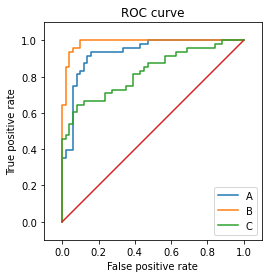

In [68]:
plt.plot(fprA, tprA, label='A')
plt.plot(fprB, tprB, label='B')
plt.plot(fprC, tprC, label='C')
plt.plot([0,1],[0,1])
plt.gca().set_aspect('equal', adjustable='box')
plt.title('ROC curve')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.xlim(-0.1,1.1)
plt.ylim(-0.1,1.1)
plt.legend()
plt.show()

#### PR curve and its AUC for each method  

In [69]:
y_true = df['label']
y_scoreA = df['A']
precisionA, recallA, thresholdsA = precision_recall_curve(y_true, y_scoreA)
print('PR-AUC(A):', auc(recallA, precisionA))
y_scoreB = df['B']
precisionB, recallB, thresholdsB = precision_recall_curve(y_true, y_scoreB)
print('PR-AUC(B):', auc(recallB, precisionB))
y_scoreC = df['C']
precisionC, recallC, thresholdsC = precision_recall_curve(y_true, y_scoreC)
print('PR-AUC(C):', auc(recallC, precisionC))

PR-AUC(A): 0.9199642842088689
PR-AUC(B): 0.9853316037502194
PR-AUC(C): 0.8567790685381907


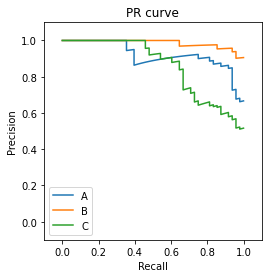

In [70]:
plt.plot(recallA, precisionA, label='A')
plt.plot(recallB, precisionB, label='B')
plt.plot(recallC, precisionC, label='C')
plt.gca().set_aspect('equal', adjustable='box')
plt.title('PR curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.xlim(-0.1,1.1)
plt.ylim(-0.1,1.1)
plt.legend()
plt.show()

#### (Accuracy around high score predictions to see the meaning of PR curves)  
accuracy: B > A > C (this corresponds to PR-AUC)  

In [71]:
display(df[['label','A']].sort_values(by='A', ascending=False).head())
display(df[['label','B']].sort_values(by='B', ascending=False).head())
display(df[['label','C']].sort_values(by='C', ascending=False).head())

,label,A
1,1.0,0.985419
18,1.0,0.985022
19,1.0,0.977655
10,1.0,0.976132
84,1.0,0.960937


,label,B
89,1.0,0.956158
93,1.0,0.941953
98,1.0,0.927044
97,1.0,0.919904
21,1.0,0.919210


,label,C
24,1.0,0.984851
76,1.0,0.980299
1,1.0,0.975581
13,1.0,0.971056
35,1.0,0.955011
